In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import pymol
from pymol import cmd

In [2]:
df = pd.read_csv('model_data.csv')
active_sdf_files = []
inactive_sdf_files = []

In [4]:
df = pd.concat([df[df['Comment'] == 'inactive'].sample(50), df[df['Comment'] == 'active'].sample(50)])

In [6]:
for index, row in df.iterrows():
    if row['Comment'] == 'active':
        active_sdf_files.append(f"diffdock_chembl_output/{row['Molecule ChEMBL ID']}/{row['Filepath']}")
    else:
        inactive_sdf_files.append(f"diffdock_chembl_output/{row['Molecule ChEMBL ID']}/{row['Filepath']}")

# Function to extract coordinates from an SDF file
def extract_coordinates(sdf_file):
    mol = Chem.SDMolSupplier(sdf_file)[0]
    conf = mol.GetConformer()
    coords = np.array([list(conf.GetAtomPosition(i)) for i in range(mol.GetNumAtoms())])
    return coords

In [7]:
# Step 2: Extract coordinates for active and inactive molecules
active_coords = [extract_coordinates(f) for f in active_sdf_files]
inactive_coords = [extract_coordinates(f) for f in inactive_sdf_files]

# Flatten the list of coordinates
active_coords_flat = np.vstack(active_coords)
inactive_coords_flat = np.vstack(inactive_coords)

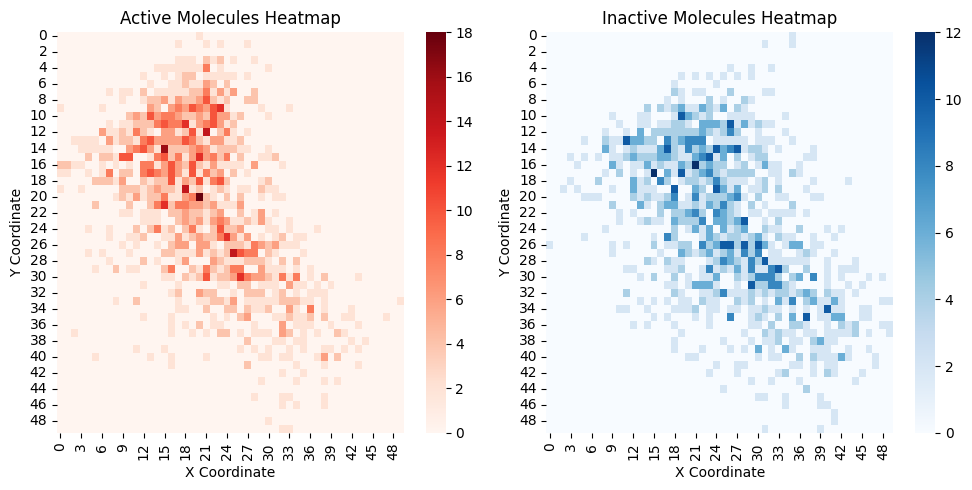

In [8]:


def create_heatmap_data(coords):
    heatmap, xedges, yedges = np.histogram2d(coords[:,0], coords[:,1], bins=50)
    return heatmap, xedges, yedges

active_heatmap, xedges, yedges = create_heatmap_data(active_coords_flat)
inactive_heatmap, xedges, yedges = create_heatmap_data(inactive_coords_flat)

# Plotting the heatmaps
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(active_heatmap.T, norm=Normalize(), cmap='Reds', cbar=True)
plt.title('Active Molecules Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.subplot(1, 2, 2)
sns.heatmap(inactive_heatmap.T, norm=Normalize(), cmap='Blues', cbar=True)
plt.title('Inactive Molecules Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

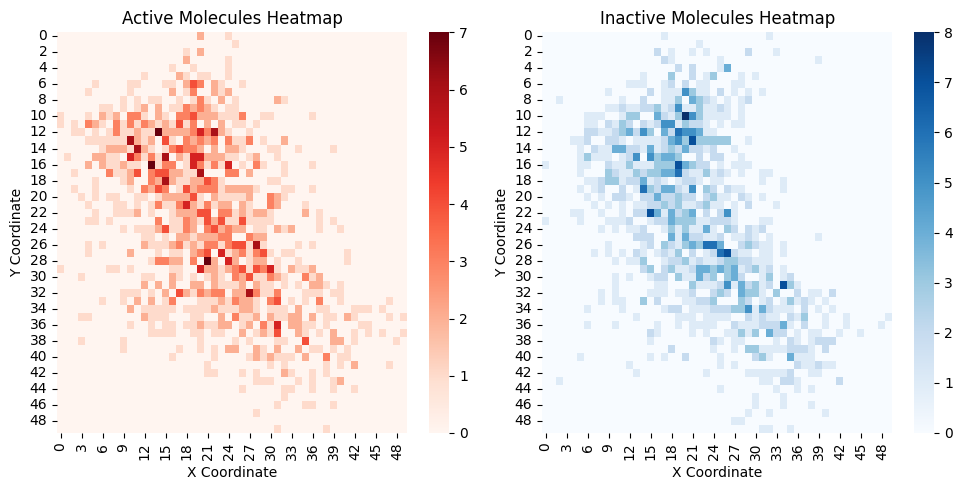

In [22]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import pymol
from pymol import cmd

df = pd.read_csv('model_data.csv')
active_sdf_files = []
inactive_sdf_files = []

df = pd.concat([df[df['Comment'] == 'inactive'].sample(50), df[df['Comment'] == 'active'].sample(50)])

for index, row in df.iterrows():
    if row['Comment'] == 'active':
        active_sdf_files.append(f"diffdock_chembl_output/{row['Molecule ChEMBL ID']}/{row['Filepath']}")
    else:
        inactive_sdf_files.append(f"diffdock_chembl_output/{row['Molecule ChEMBL ID']}/{row['Filepath']}")

# Function to extract coordinates from an SDF file
def extract_coordinates(sdf_file):
    mol = Chem.SDMolSupplier(sdf_file)[0]
    conf = mol.GetConformer()
    coords = np.array([list(conf.GetAtomPosition(i)) for i in range(mol.GetNumAtoms())])
    return coords
# Step 2: Extract coordinates for active and inactive molecules
active_coords = [extract_coordinates(f) for f in active_sdf_files]
inactive_coords = [extract_coordinates(f) for f in inactive_sdf_files]

# Flatten the list of coordinates
active_coords_flat = np.vstack(active_coords)
inactive_coords_flat = np.vstack(inactive_coords)

def create_heatmap_data(coords):
    heatmap, xedges, yedges = np.histogram2d(coords[:,0], coords[:,1], bins=50)
    return heatmap, xedges, yedges

active_heatmap, xedges, yedges = create_heatmap_data(active_coords_flat)
inactive_heatmap, xedges, yedges = create_heatmap_data(inactive_coords_flat)

# Plotting the heatmaps
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(active_heatmap.T, norm=Normalize(), cmap='Reds', cbar=True)
plt.title('Active Molecules Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.subplot(1, 2, 2)
sns.heatmap(inactive_heatmap.T, norm=Normalize(), cmap='Blues', cbar=True)
plt.title('Inactive Molecules Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

In [7]:
cmd.load("GLP1.pdb")

In [8]:
# Create heatmap in PyMOL
def create_heatmap_pymol(coords, base_name, color):
    selection_name = f'{base_name}_pts'
    
    # Clear existing selections
    cmd.delete(selection_name)
    cmd.delete(f'{base_name}_map')
    cmd.delete(f'{base_name}_surface')
    
    # Creating pseudoatoms
    for i, coord in enumerate(coords):
        atom_name = f'{selection_name}_{i}'
        cmd.pseudoatom(selection_name, pos=coord.tolist())
    
    # Ensure selection contains all pseudoatoms
    cmd.select(selection_name, f'{selection_name}*')
    
    # Creating the map and isosurface
    cmd.map_new(f'{base_name}_map', 'gaussian', 1, selection_name)
    cmd.isosurface(f'{base_name}_surface', f'{base_name}_map', level=1)
    cmd.color(color, f'{base_name}_surface')
    cmd.show_as('surface', f'{base_name}_surface')

# Generate heatmap for active molecules
print("Generating heatmap for active molecules...")
create_heatmap_pymol(active_coords_flat, 'active', 'red')
print("Heatmap for active molecules generated.")

# Generate heatmap for inactive molecules
print("Generating heatmap for inactive molecules...")
create_heatmap_pymol(inactive_coords_flat, 'inactive', 'blue')
print("Heatmap for inactive molecules generated.")

# Adjust visualization
cmd.bg_color('white')
cmd.show('cartoon', 'GLP1')
cmd.color('green', 'GLP1')
cmd.zoom()

Generating heatmap for active molecules...


CmdException:  Error: name conflicts with an object

In [ ]:
# def create_heatmap_pymol(coords, selection_name, color):
#     for coord in coords:
#         cmd.pseudoatom(selection_name, pos=coord.tolist())
#     cmd.map_new(selection_name + '_map', 'gaussian', 1, selection_name)
#     cmd.isosurface(selection_name + '_surface', selection_name + '_map', level=1)
#     cmd.color(color, selection_name + '_surface')
#     cmd.show_as('surface', selection_name + '_surface')

# # Creating heatmap for active molecules
# print("generating for actives...")
# create_heatmap_pymol(active_coords_flat, 'active_coords', 'red')
# print("actives generated")

# # Creating heatmap for inactive molecules
# print("generating for inactives...")
# create_heatmap_pymol(inactive_coords_flat, 'inactive_coords', 'blue')
# print("inactives generated")

# # Adjusting visualization
# cmd.bg_color('white')
# cmd.show('cartoon', 'GLP1')
# cmd.color('green', 'GLP1')
# cmd.zoom()

# pymol.cmd.png("heatmap_visualization.png")

In [ ]:
len(active_coords)

In [ ]:
len(inactive_coords)